In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('../cleaned_data.csv', index_col=0)
df.head()
target = 'cnt'

In [3]:
print("\n## X Head ##")
X = df.drop(target, axis=1)
print(X.head())

print("\n## Y Head ##")
y = df[target]
print(y.head())


## X Head ##
   yr  holiday  workingday  temp   atemp   hum  windspeed  season_1  season_2  \
0   0        0           0  0.24  0.2879  0.81        0.0         1         0   
1   0        0           0  0.22  0.2727  0.80        0.0         1         0   
2   0        0           0  0.22  0.2727  0.80        0.0         1         0   
3   0        0           0  0.24  0.2879  0.75        0.0         1         0   
4   0        0           0  0.24  0.2879  0.75        0.0         1         0   

   season_3      ...       weekday_1  weekday_2  weekday_3  weekday_4  \
0         0      ...               0          0          0          0   
1         0      ...               0          0          0          0   
2         0      ...               0          0          0          0   
3         0      ...               0          0          0          0   
4         0      ...               0          0          0          0   

   weekday_5  weekday_6  weathersit_1  weathersit_2  weather

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

print( len(y) )
print( len(y_train) )
print( len(X_test) )
print( len(y_test) )


17379
12165
5214
5214


In [5]:
alphas = np.linspace(0.01, 1, num=20)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5


In [6]:
lasso = Lasso(random_state=42)

grid_search = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': array([0.01   , 0.06211, 0.11421, 0.16632, 0.21842, 0.27053, 0.32263,
       0.37474, 0.42684, 0.47895, 0.53105, 0.58316, 0.63526, 0.68737,
       0.73947, 0.79158, 0.84368, 0.89579, 0.94789, 1.     ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [7]:
scores = grid_search.cv_results_['mean_test_score']
print(scores)

scores_std = grid_search.cv_results_['std_test_score']
print(scores_std)

[0.68448326 0.68440571 0.68418755 0.68380646 0.68327261 0.6826282
 0.68193101 0.68116133 0.68028195 0.67929161 0.67820464 0.67701957
 0.67573668 0.67436273 0.6729013  0.67137647 0.66977519 0.66810332
 0.66635226 0.66453524]
[0.01204022 0.01173995 0.01146245 0.01121374 0.01095579 0.01070624
 0.01050888 0.01029373 0.01006359 0.00983469 0.00960663 0.00936955
 0.00914446 0.00894397 0.00875083 0.00855866 0.00838827 0.00825519
 0.00811709 0.00797714]


In [8]:
from sklearn.metrics import mean_squared_error


(0.01, 1.0)

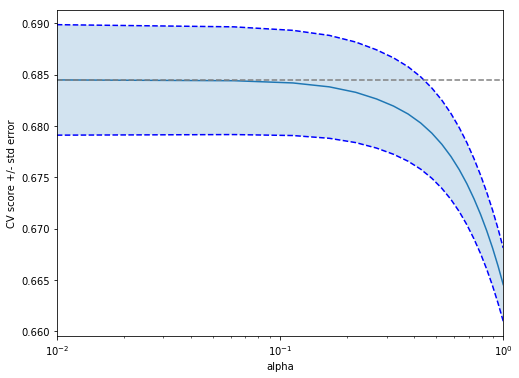

In [9]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])